## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, \
                            recall_score, f1_score, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

## Importing Dataset

In [6]:
df = pd.read_csv('hearing_test.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [8]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [9]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


## Exploratory Data Analysis

<Axes: xlabel='test_result', ylabel='count'>

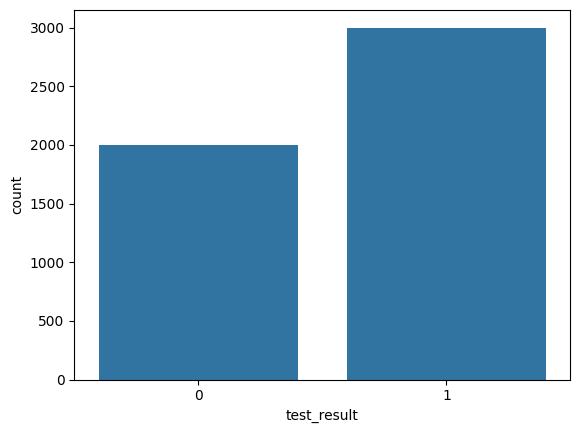

In [10]:
sns.countplot(data=df, x='test_result')

<Axes: xlabel='test_result', ylabel='age'>

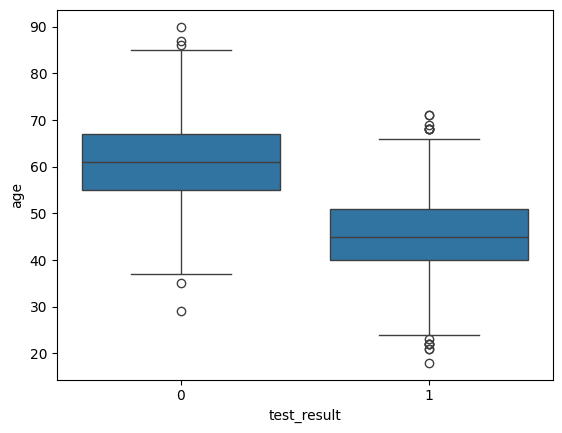

In [11]:
sns.boxplot(data=df, x='test_result', y='age')

<Axes: xlabel='test_result', ylabel='physical_score'>

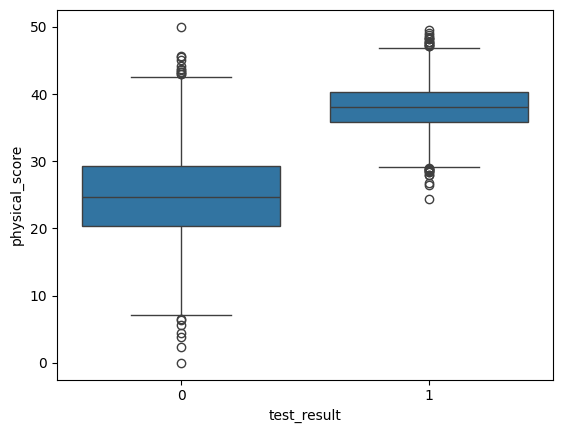

In [12]:
sns.boxplot(data=df, x='test_result', y='physical_score')

<Axes: xlabel='age', ylabel='physical_score'>

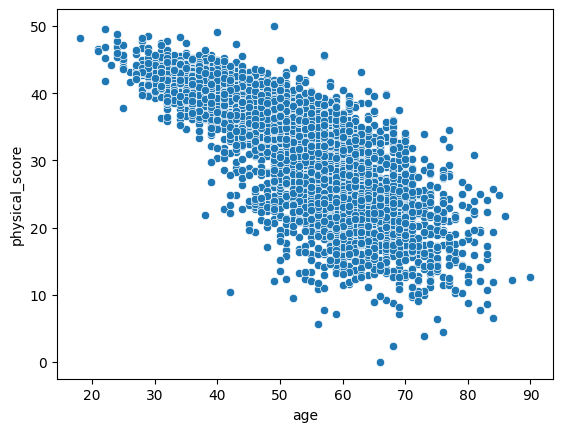

In [13]:
sns.scatterplot(data=df, x='age', y='physical_score')

<Axes: xlabel='age', ylabel='physical_score'>

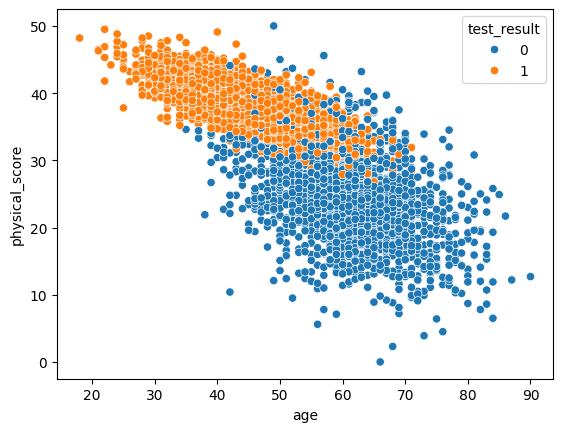

In [14]:
sns.scatterplot(data=df, x='age', y='physical_score', hue='test_result')

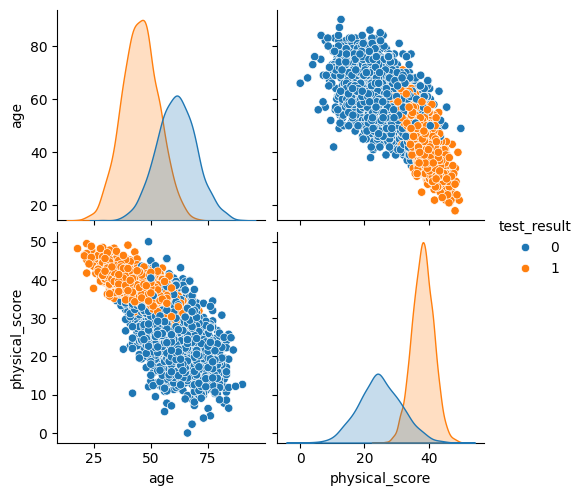

In [15]:
sns.pairplot(data=df, hue='test_result')

<Axes: >

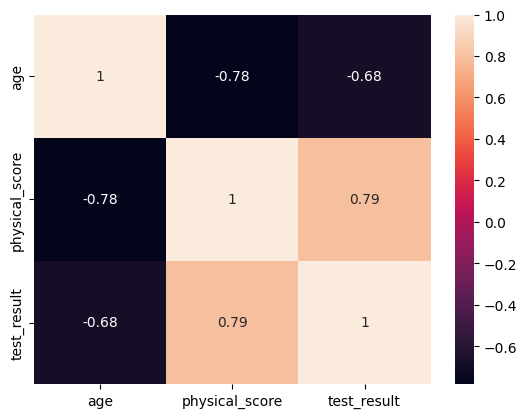

In [16]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Splitting Data

In [17]:
X = df.drop('test_result', axis=1)

In [18]:
y = df['test_result']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

## Preprocessing

In [20]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Creating Model

In [21]:
model = LogisticRegression()

In [22]:
model.fit(scaled_X_train, y_train)

LogisticRegression()

In [23]:
model.coef_

array([[-0.95017725,  3.46148946]])

## Prediction and Evaluation

In [24]:
prediction = model.predict(scaled_X_test)

In [25]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



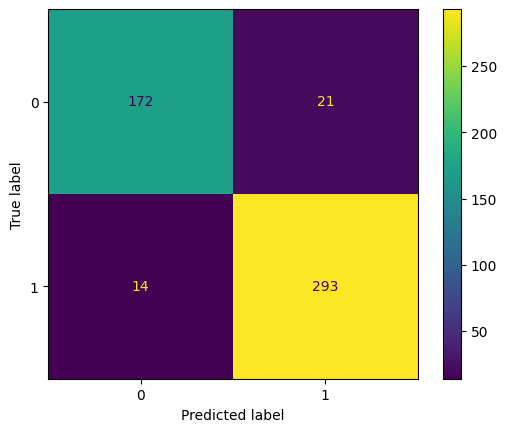

In [26]:
matrix = confusion_matrix(y_test, prediction)
confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix=matrix)
confusion_matrix_plot.plot()

In [27]:
print(f"Accuracy Score: {accuracy_score(y_test, prediction)}")
print(f"Precision Score: {precision_score(y_test, prediction)}")
print(f"Recall Score: {recall_score(y_test, prediction)}")
print(f"F1 Score: {f1_score(y_test, prediction)}")

Accuracy Score: 0.93
Precision Score: 0.9331210191082803
Recall Score: 0.9543973941368078
F1 Score: 0.9436392914653784


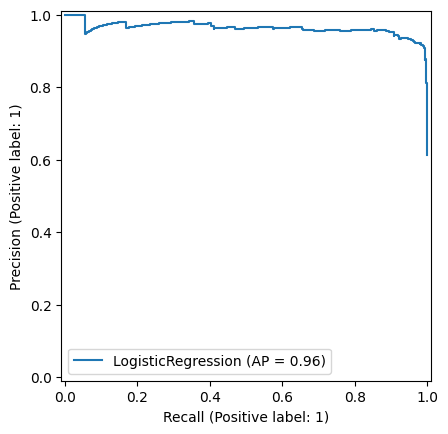

In [28]:
PrecisionRecallDisplay.from_estimator(model, scaled_X_test, y_test)

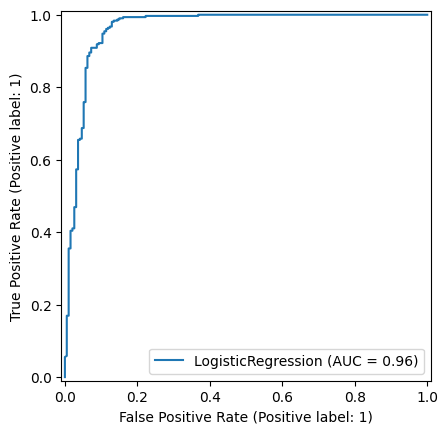

In [29]:
RocCurveDisplay.from_estimator(model, scaled_X_test, y_test)